In [11]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('C:/Users/HARSH PATIL/Desktop/dataset/3-4. AcademicPerformance.csv')
df


,Rollno,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,NaN,Yes
...,...,...,...,...,...
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No
98,99,35.0,0,44.0,NaN


In [12]:

df.isnull().sum()


Rollno     0
Marks      0
Gender     0
Age       16
PhD       13
dtype: int64

In [13]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df.fillna("null",inplace=True)
df.isnull().sum()

Rollno    0
Marks     0
Gender    0
Age       0
PhD       0
dtype: int64

In [14]:
outliers = []
def detect(df):
    threshold = 3
    mean = np.mean(df)
    std = np.std(df)
    
    for d in df:
        z_score = (d-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(d)
    return outliers

In [15]:
var='Marks'

In [16]:
z_scores=detect(df[var])
outliers=df[df[var].isin(z_scores)]
outliers

,Rollno,Marks,Gender,Age,PhD
18,19,190.0,1,66.0,Yes


In [17]:
dfs = df[~df.index.isin(outliers.index)]
#df2=df[var].drop(df[var][df[var].isin(z_scores)])
dfs

,Rollno,Marks,Gender,Age,PhD
0,1,140.0,1,47.000000,Yes
1,2,30.0,0,65.000000,Yes
2,3,35.1,0,56.000000,No
3,4,30.0,1,23.000000,No
4,5,80.0,0,47.821429,Yes
...,...,...,...,...,...
95,96,18.6,1,26.000000,No
96,97,152.0,1,56.000000,Yes
97,98,1.8,1,28.000000,No
98,99,35.0,0,44.000000,null


In [18]:
dfs.skew(axis =0)

C:\Users\HARSH PATIL\AppData\Local\Temp\ipykernel_10236\4029879126.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs.skew(axis =0)


Rollno   -0.020245
Marks     0.958305
Gender    0.020515
Age      -0.246740
dtype: float64

array([[<Axes: title={'center': 'Rollno'}>,
        <Axes: title={'center': 'Marks'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

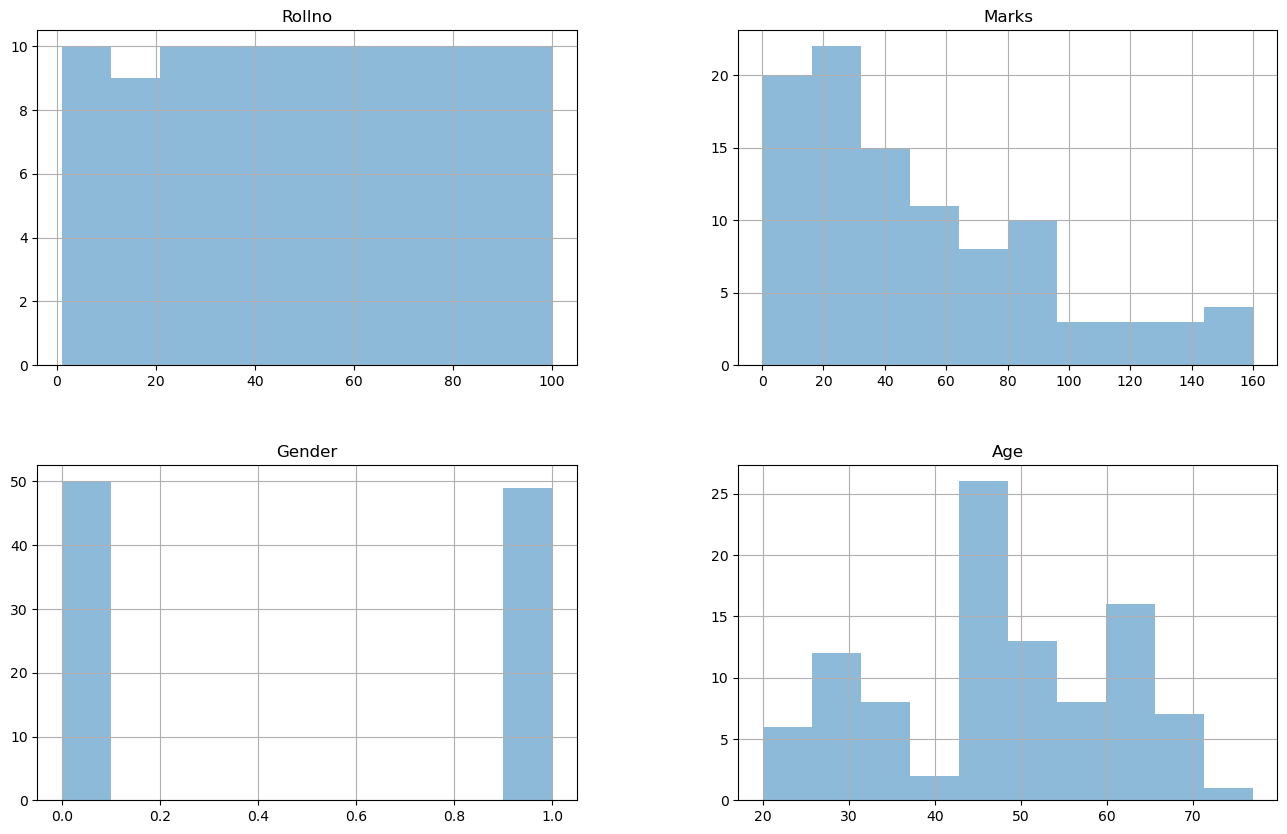

In [19]:
dfs.hist(alpha=0.5, figsize=(16, 10))

<Axes: xlabel='Marks', ylabel='Density'>

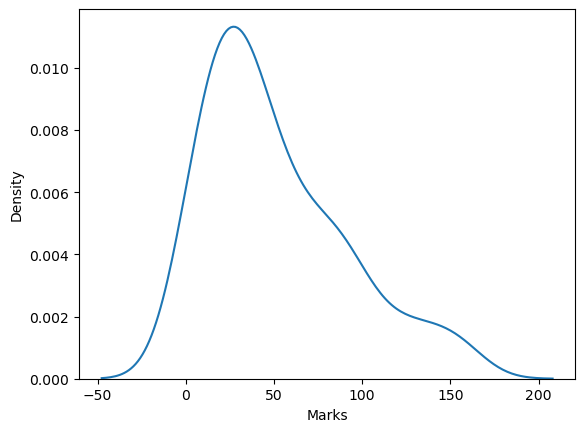

In [20]:
sns.kdeplot(dfs['Marks'])

<Axes: xlabel='Marks', ylabel='Density'>

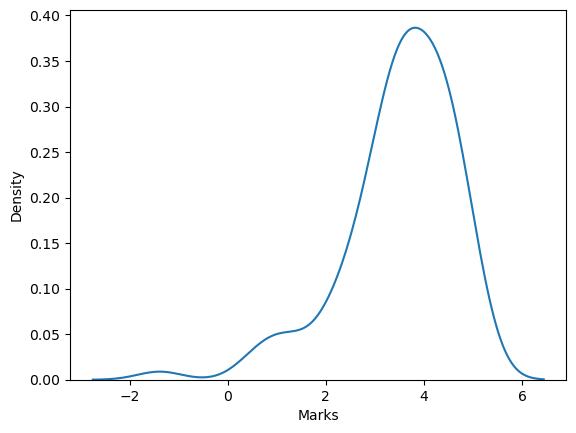

In [21]:
a = np.log(dfs['Marks'])

a.skew(axis=0)

sns.kdeplot(a)

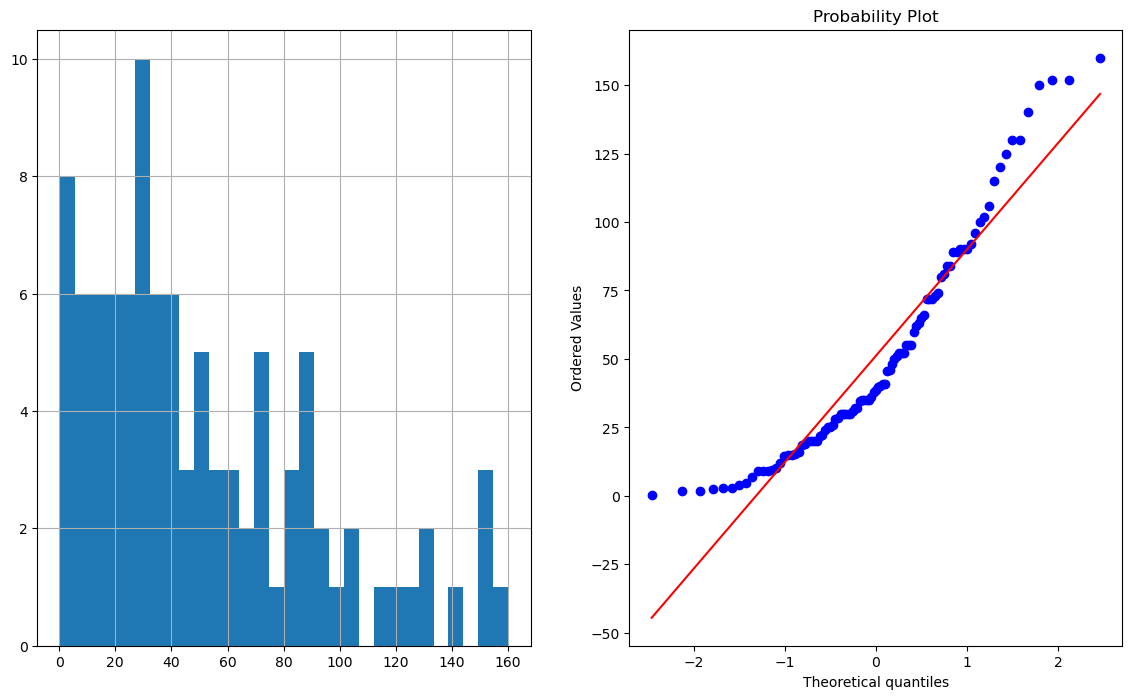

In [22]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
dfs['Marks'].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(dfs['Marks'], dist="norm", plot=plt)
plt.show()

<Axes: xlabel='Marks', ylabel='Density'>

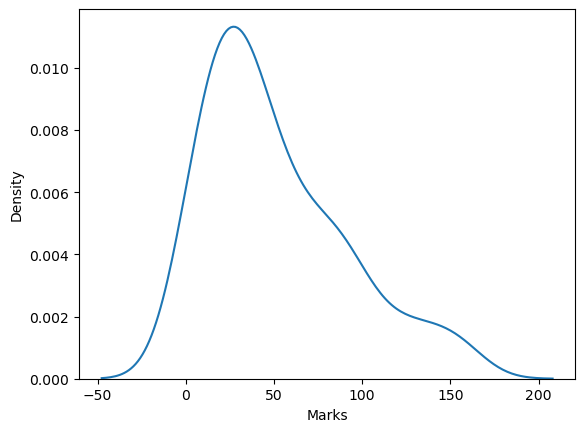

In [23]:
sns.kdeplot(dfs['Marks'])

In [27]:
cols = ["Marks","Age"]
x = df.loc[:,cols]
x

,Marks,Age
0,140.0,47.000000
1,30.0,65.000000
2,35.1,56.000000
3,30.0,23.000000
4,80.0,47.821429
...,...,...
95,18.6,26.000000
96,152.0,56.000000
97,1.8,28.000000
98,35.0,44.000000


In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 2.08228902, -0.05995937],
       [-0.53617892,  1.25393299],
       [-0.41477722,  0.59698681],
       [-0.53617892, -1.81181586],
       [ 0.65403378,  0.        ],
       [-0.53617892, -1.51983978],
       [ 0.1779487 ,  0.37800475],
       [-0.50999424,  0.        ],
       [ 1.72522521, -0.27894143],
       [-0.03628959,  1.10794495],
       [-1.17889378, -1.88480988],
       [-0.15531085,  0.81596887],
       [ 2.32033156,  0.88896289],
       [-1.17889378, -1.44684576],
       [ 1.84424648,  1.25393299],
       [-0.89324273,  0.        ],
       [ 1.84424648,  1.25393299],
       [ 0.7492508 , -0.05995937],
       [ 3.27250172,  1.32692701],
       [ 0.51120826, -0.20594741],
       [ 0.487404  , -0.13295339],
       [-1.012264  ,  0.        ],
       [-0.06009384,  0.88896289],
       [-1.08367676,  1.10794495],
       [-1.02416612, -1.51983978],
       [-0.88848188,  1.32692701],
       [-0.56950487, -0.8628936 ],
       [-0.77422146,  0.        ],
       [ 0.46359975,

In [29]:
x1 = np.transpose(x)
x1

array([[ 2.08228902, -0.53617892, -0.41477722, -0.53617892,  0.65403378,
        -0.53617892,  0.1779487 , -0.50999424,  1.72522521, -0.03628959,
        -1.17889378, -0.15531085,  2.32033156, -1.17889378,  1.84424648,
        -0.89324273,  1.84424648,  0.7492508 ,  3.27250172,  0.51120826,
         0.487404  , -1.012264  , -0.06009384, -1.08367676, -1.02416612,
        -0.88848188, -0.56950487, -0.77422146,  0.46359975,  0.67783803,
         1.13011886,  0.89207632,  0.89207632, -0.41715765, -0.53617892,
        -0.65520019, -0.01248533, -1.03606825,  0.24936146,  0.46359975,
        -0.86943847,  0.93968483,  1.27294438, -1.1907959 , -1.03606825,
        -0.48857041, -0.48857041,  0.05892743, -0.01248533, -0.58378743,
        -0.77422146, -0.900384  , -0.71947167, -0.4219185 ,  0.7492508 ,
        -0.79802571,  2.5583741 ,  0.29696997,  0.05892743, -1.14080697,
         1.17772737, -0.77422146,  0.22555721,  0.05892743, -0.16483256,
        -0.29813638, -0.67900444, -0.41715765, -0.1

In [30]:
len(x1)

2

In [33]:
df1 = {}
for i in range(2):
    df1[cols[i]] = list(x1[i])
df1 = pd.DataFrame(df1)
df1.head()

,Marks,Age
0,2.082289,-0.059959
1,-0.536179,1.253933
2,-0.414777,0.596987
3,-0.536179,-1.811816
4,0.654034,0.000000


In [34]:
for i in cols:
    df[i] = df1[i]
df.tail()

,Rollno,Marks,Gender,Age,PhD
95,96,-0.807547,1,-1.592834,No
96,97,2.367940,1,0.596987,Yes
97,98,-1.207459,1,-1.446846,No
98,99,-0.417158,0,-0.278941,null
99,100,-1.155090,0,-1.738822,No
